In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle
import joblib
import os

In [2]:
df_original = fetch_california_housing()
print(df_original.keys())
print(df_original.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [3]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a DataFrame from the dataset
df_raw = housing.frame
df_raw.to_csv('data_raw.csv', index=False)

df_original = df_raw.rename(columns={
    "MedInc": "median_income",
    "HouseAge": "median_house_age",
    "AveRooms": "avg_rooms",
    "AveBedrms": "avg_bedrooms",
    "Population": "population",
    "AveOccup": "avg_occupants",
    "Latitude": "latitude",
    "Longitude": "longitude",
    "MedHouseVal": "PRICE"
})

df_original.head()

,median_income,median_house_age,avg_rooms,avg_bedrooms,population,avg_occupants,latitude,longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
median_income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
avg_rooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
avg_bedrooms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
avg_occupants,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
PRICE,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [5]:
print(df_original.info())
# Check for missing values
print(f"\n{df_original.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   median_income     20640 non-null  float64
 1   median_house_age  20640 non-null  float64
 2   avg_rooms         20640 non-null  float64
 3   avg_bedrooms      20640 non-null  float64
 4   population        20640 non-null  float64
 5   avg_occupants     20640 non-null  float64
 6   latitude          20640 non-null  float64
 7   longitude         20640 non-null  float64
 8   PRICE             20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

median_income       0
median_house_age    0
avg_rooms           0
avg_bedrooms        0
population          0
avg_occupants       0
latitude            0
longitude           0
PRICE               0
dtype: int64


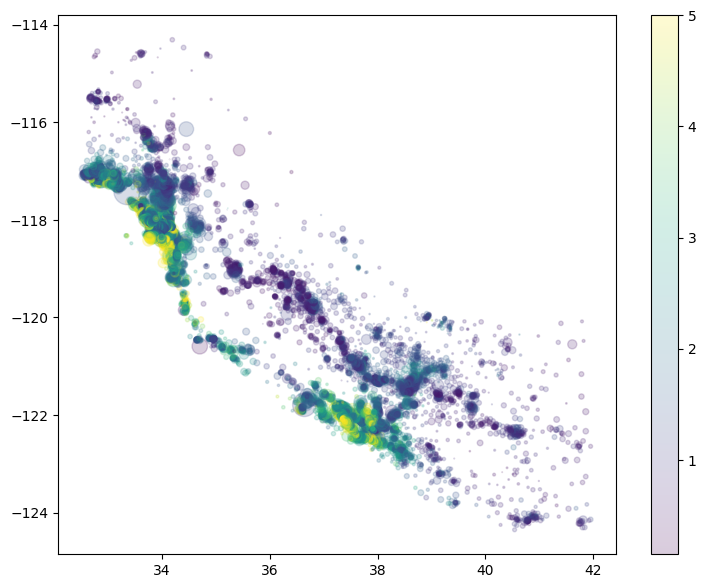

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
plt.scatter(df_original.latitude, df_original.longitude, alpha=0.2, c=df_original.PRICE, s=df_original.population/100)
plt.colorbar()

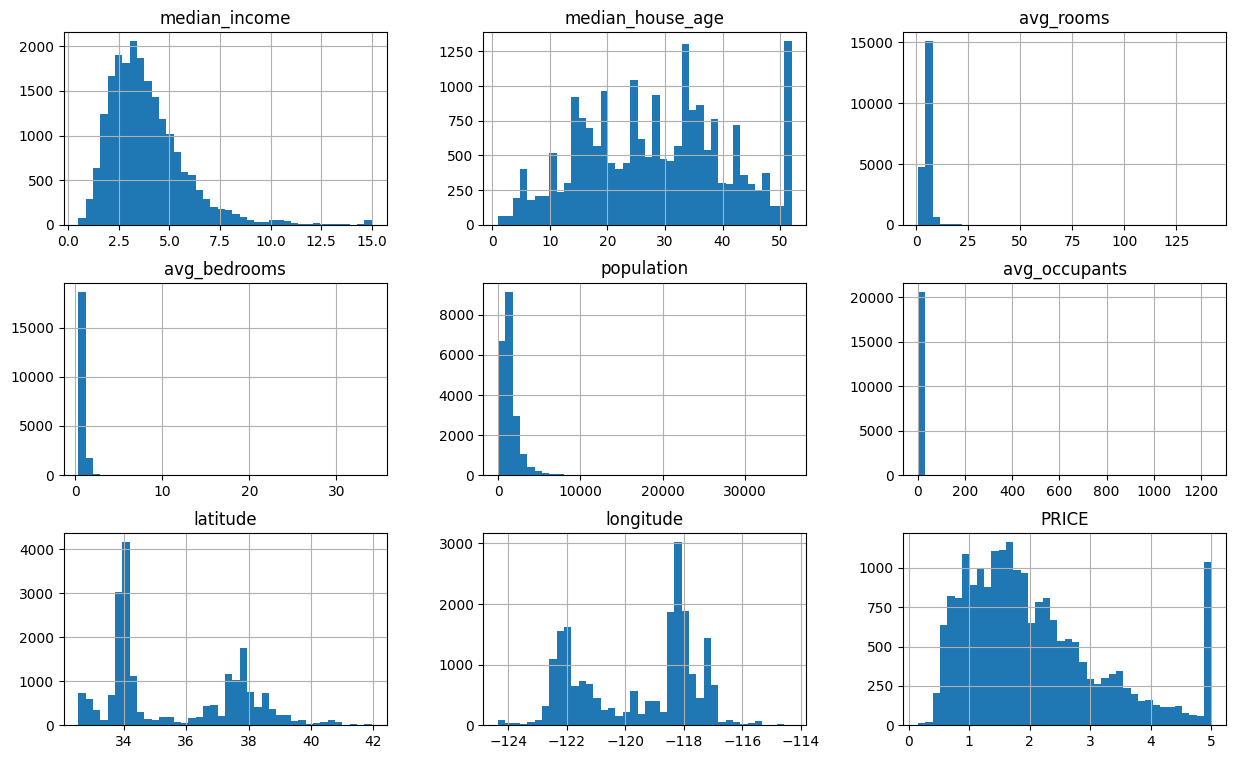

In [7]:
df_original.hist(bins=40, figsize=(15, 9))
plt.show()

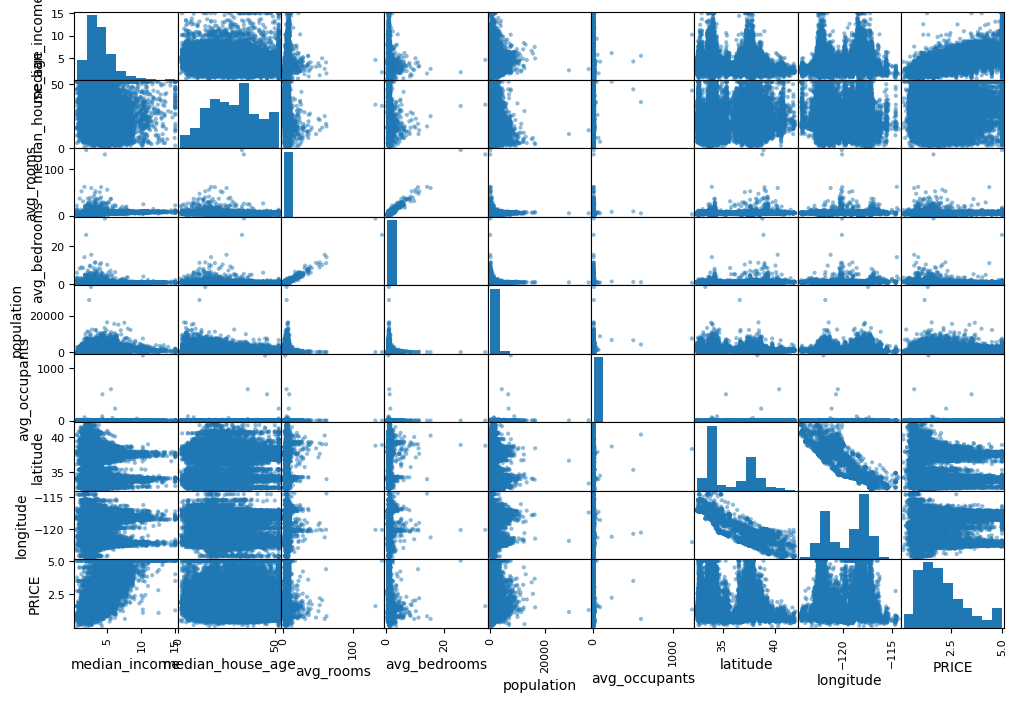

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_original, figsize=(12, 8))
plt.show()

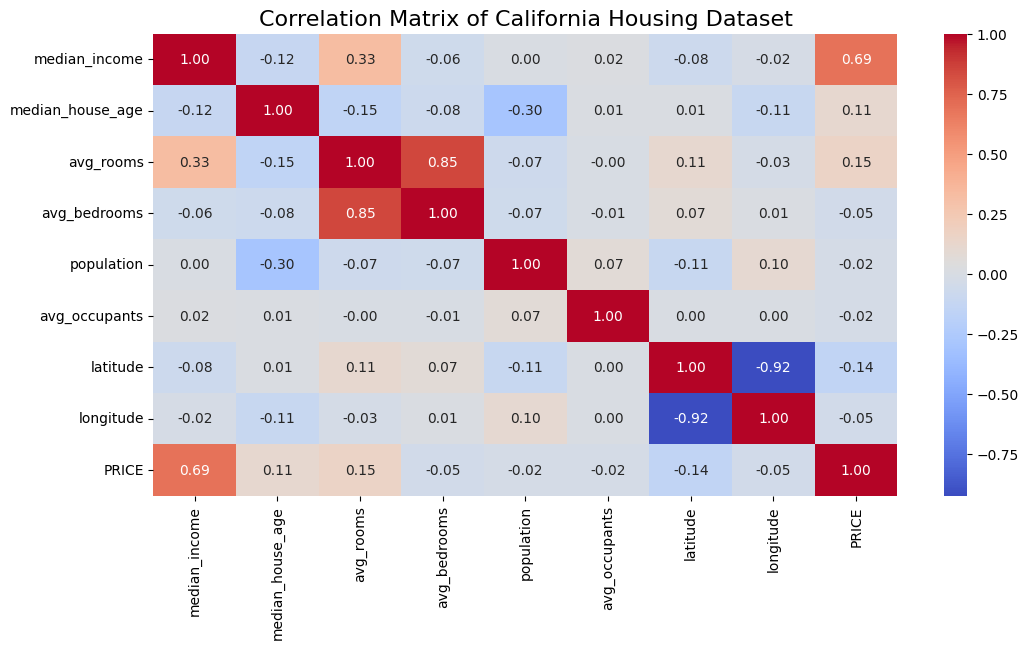

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of California Housing Dataset', fontsize=16)
plt.show()

# Data pre-processing

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target
df = df_original.drop(columns=['latitude', 'longitude'])
X = df_original.drop('PRICE', axis=1)
y = df_original['PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standartization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

def print_metrics_report(model_name, mae, rmse, r2):
    print(f"--- {model_name} Model Evaluation ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared Error (R2): {r2:.4f}")
    print("-------------------------------------")

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=10, random_state=42),
}

In [13]:
print(f"{'Model':<20} | {'MAE':<10} | {'RMSE':<10} | {'R^2':<10}")
print(f"{'-'*20} | {'-'*10} | {'-'*10} | {'-'*10}")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae, rmse, r2 = calculate_metrics(y_test, y_pred)
    print(f"{name:<20} | {mae:<10.4f} | {rmse:<10.4f} | {r2:<10.4f}")

Model                | MAE        | RMSE       | R^2       
-------------------- | ---------- | ---------- | ----------
Linear Regression    | 0.5332     | 0.7456     | 0.5758    
Random Forest        | 0.3274     | 0.5051     | 0.8053    
XGBoost              | 0.2987     | 0.4637     | 0.8359    


## Linear Regression Model

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
mae, rmse, r2 = calculate_metrics(y_test, y_pred)
print_metrics_report("LinearRegression", mae, rmse, r2)

--- LinearRegression Model Evaluation ---
Mean Absolute Error (MAE): 0.5332
Root Mean Squared Error (RMSE): 0.7456
R-squared Error (R2): 0.5758
-------------------------------------


## Random Forest Regressor Model

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
mae, rmse, r2 = calculate_metrics(y_test, y_pred)
print_metrics_report("RandomForestRegressor", mae, rmse, r2)

--- RandomForestRegressor Model Evaluation ---
Mean Absolute Error (MAE): 0.3274
Root Mean Squared Error (RMSE): 0.5051
R-squared Error (R2): 0.8053
-------------------------------------


## XGBoost Regressor Model

In [16]:
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)
mae, rmse, r2 = calculate_metrics(y_test, y_pred)
print_metrics_report("XGBRegressor", mae, rmse, r2)

--- XGBRegressor Model Evaluation ---
Mean Absolute Error (MAE): 0.2987
Root Mean Squared Error (RMSE): 0.4637
R-squared Error (R2): 0.8359
-------------------------------------


# The Best Model

In [17]:
# Train the XGBoost Regressor Model
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

# Model Storing

In [18]:
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))